In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=1JBY-RmHNkBS99fsgALtVcb2Vc9iY-ARJ')

In [ ]:
num_columns = df.shape[1]
print(f"Number of columns in the dataset: {num_columns}")

Number of columns in the dataset: 33


In [ ]:
print("\n--- Numeric Columns Analysis ---")
numeric_cols = df.select_dtypes(include=['number'])
if not numeric_cols.empty:
    print(numeric_cols.describe())
else:
    print("No numeric columns found in the dataset for description.")


--- Numeric Columns Analysis ---
          day_precip  day_precipcover       day_snow  day_windspeed  \
count  608235.000000    608235.000000  608235.000000  608235.000000   
mean        2.095817         6.553236       0.121145      18.545865   
std        10.686203        12.103634       0.662885       6.887745   
min         0.000000         0.000000       0.000000       2.500000   
25%         0.000000         0.000000       0.000000      14.000000   
50%         0.100000         4.170000       0.000000      18.000000   
75%         1.092000         8.330000       0.000000      22.000000   
max       306.000000       100.000000      16.100000      90.000000   

         day_winddir    day_uvindex      hour_temp  hour_humidity  \
count  608235.000000  608235.000000  608235.000000  608235.000000   
mean      191.153775       4.804640      10.719585      72.889725   
std       106.205077       2.653039       9.788004      19.456807   
min         0.000000       0.000000     -50.300000

In [ ]:
print("\n--- Object (Text) Columns Analysis ---")
object_cols = df.select_dtypes(include=['object'])
if not object_cols.empty:
    for col in object_cols:
        unique_count = df[col].nunique()
        print(f"\nColumn '{col}':")
        print(f"  Number of unique values: {unique_count}")
        if unique_count < 20:  # Display unique values if few
            print(f"  Unique values: {df[col].unique()}")
        most_frequent = df[col].mode()
        if not most_frequent.empty:
            print(f"  Most frequent value: {most_frequent.iloc[0]}")
else:
    print("No object (text) columns found in the dataset for description.")


--- Object (Text) Columns Analysis ---

Column 'city_address':
  Number of unique values: 23
  Most frequent value: Cherkasy

Column 'day_sunrise':
  Number of unique values: 11480
  Most frequent value: 06:40:34

Column 'day_sunset':
  Number of unique values: 14590
  Most frequent value: 16:22:41

Column 'datetime':
  Number of unique values: 26445
  Most frequent value: 2022-02-24 00:00:00

Column 'date':
  Number of unique values: 1102
  Most frequent value: 2022-02-24


In [ ]:
print("\n--- Boolean Columns Analysis (if any) ---")
bool_cols = df.select_dtypes(include=['bool'])
if not bool_cols.empty:
    for col in bool_cols:
        true_count = df[col].sum()
        false_count = len(df) - true_count
        print(f"\nColumn '{col}':")
        print(f"  Number of True: {true_count}")
        print(f"  Number of False: {false_count}")
else:
    print("No boolean columns found in the dataset for analysis.")


--- Boolean Columns Analysis (if any) ---

Column 'anomaly':
  Number of True: 84841
  Number of False: 523394


In [ ]:
if 'anomaly' in df.columns:
    anomaly_count = df['anomaly'].sum()
    total_count = len(df)
    anomaly_percentage = (anomaly_count / total_count) * 100
    print(f"\n--- Anomaly Analysis ---")
    print(f"Number of rows with 'anomaly' (True/1): {anomaly_count}")
    print(f"Total number of rows: {total_count}")
    print(f"Percentage of rows with anomalies: {anomaly_percentage:.2f}%")
else:
    print("\nColumn 'anomaly' not found.")


--- Anomaly Analysis ---
Number of rows with 'anomaly' (True/1): 84841
Total number of rows: 608235
Percentage of rows with anomalies: 13.95%


In [ ]:
print("\n--- 'datetime' Column Analysis (if any) ---")
if 'datetime' in df.columns:
    try:
        df['datetime'] = pd.to_datetime(df['datetime'])
        print(f"  Minimum date: {df['datetime'].min()}")
        print(f"  Maximum date: {df['datetime'].max()}")
    except Exception as e:
        print(f"  Error processing 'datetime' column: {e}")
else:
    print("\nColumn 'datetime' not found.")


--- 'datetime' Column Analysis (if any) ---
  Minimum date: 2022-02-24 00:00:00
  Maximum date: 2025-03-01 23:00:00


In [ ]:
print("\n--- 'text_vector' Column Analysis ---")
if 'text_vector' in df.columns:
    print("  The 'text_vector' column contains vector representations of text. Deep analysis requires NLP methods.")
    print(f"  First element of 'text_vector': {df['text_vector'].iloc[0] if not df['text_vector'].empty else None}")
else:
    print("Column 'text_vector' not found.")


--- 'text_vector' Column Analysis ---
  The 'text_vector' column contains vector representations of text. Deep analysis requires NLP methods.
  First element of 'text_vector': nan


In [ ]:
df = df.dropna()

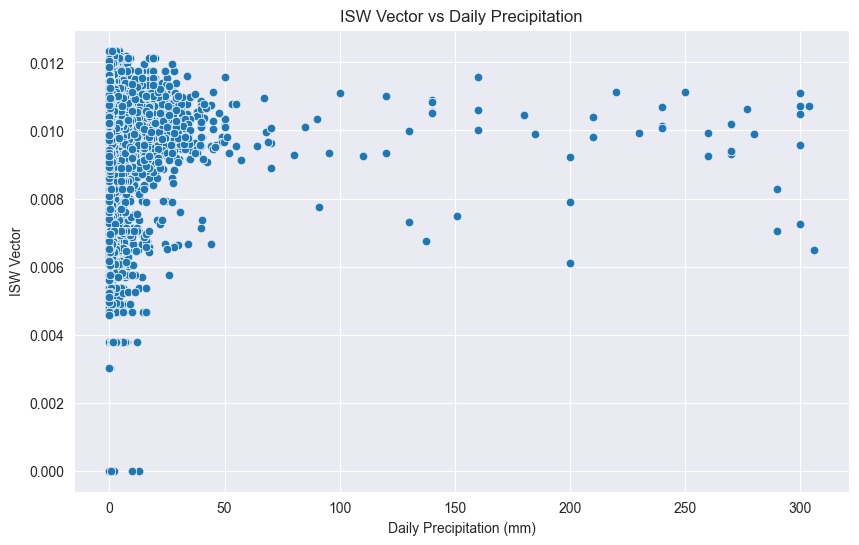

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='day_precip', y='text_vector', data=df, alpha=0.6)
plt.title('ISW Vector vs Daily Precipitation')
plt.xlabel('Daily Precipitation (mm)')
plt.ylabel('ISW Vector')
plt.show()

1. Attempts to visualize the relationship between "Daily Precipitation (mm)" on the horizontal axis and "ISW Vector" on the vertical axis.

The horizontal axis (x-axis) is labeled "Daily Precipitation (mm)" and ranges from 0 to 300. The majority of data points are clustered at lower precipitation values, below 50 mm.

The vertical axis (y-axis) is labeled "ISW Vector" and displays numerical values between 0.000 and 0.012. There is a dense band of points clustered around the lower end of this range (below 0.006).

There are numerous small, light blue dots scattered across the plot area, each representing a data point with a specific daily precipitation value and a corresponding "ISW Vector" value. The alpha=0.6 parameter in the code makes the points slightly transparent, which helps to visualize density in areas with overlapping points.

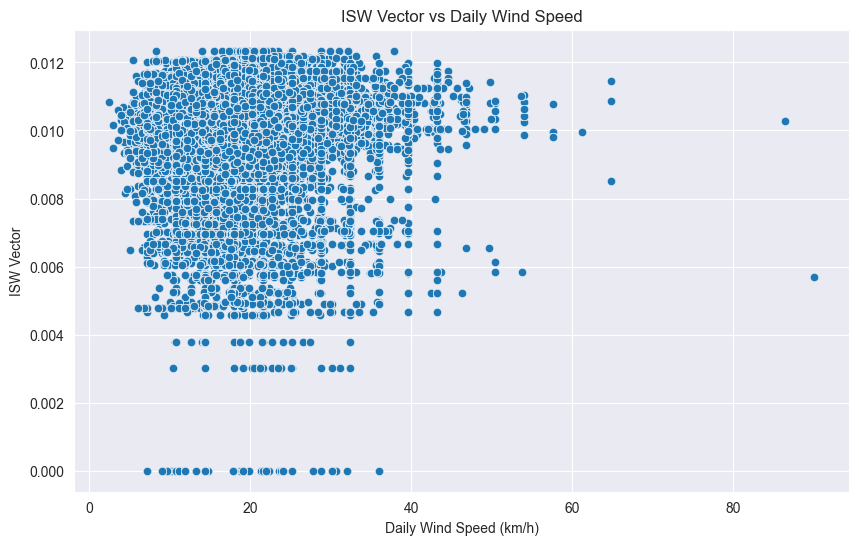

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='day_windspeed', y='text_vector', data=df, alpha=0.6)
plt.title('ISW Vector vs Daily Wind Speed')
plt.xlabel('Daily Wind Speed (km/h)')
plt.ylabel('ISW Vector')
plt.show()

2. Dense Cluster at Low ISW Vector Values: There is a significant concentration of data points where the "ISW Vector" values are below approximately 0.006, and these points span a relatively wide range of daily wind speeds, from near 0 up to around 40 km/h. This suggests that these lower "ISW Vector" values occur across various daily wind speed conditions.

Scattered Points at Higher ISW Vector Values: For "ISW Vector" values above 0.006, the data points are much more sparse and scattered across the range of daily wind speeds observed (0 to 80 km/h). There isn't a visible trend indicating that higher "ISW Vector" values are consistently associated with either higher or lower wind speeds.

No Obvious Trend: I cannot identify any increasing or decreasing trend in the "ISW Vector" values as the daily wind speed changes. The points appear to be distributed somewhat randomly across the wind speed spectrum for the majority of the "ISW Vector" range.

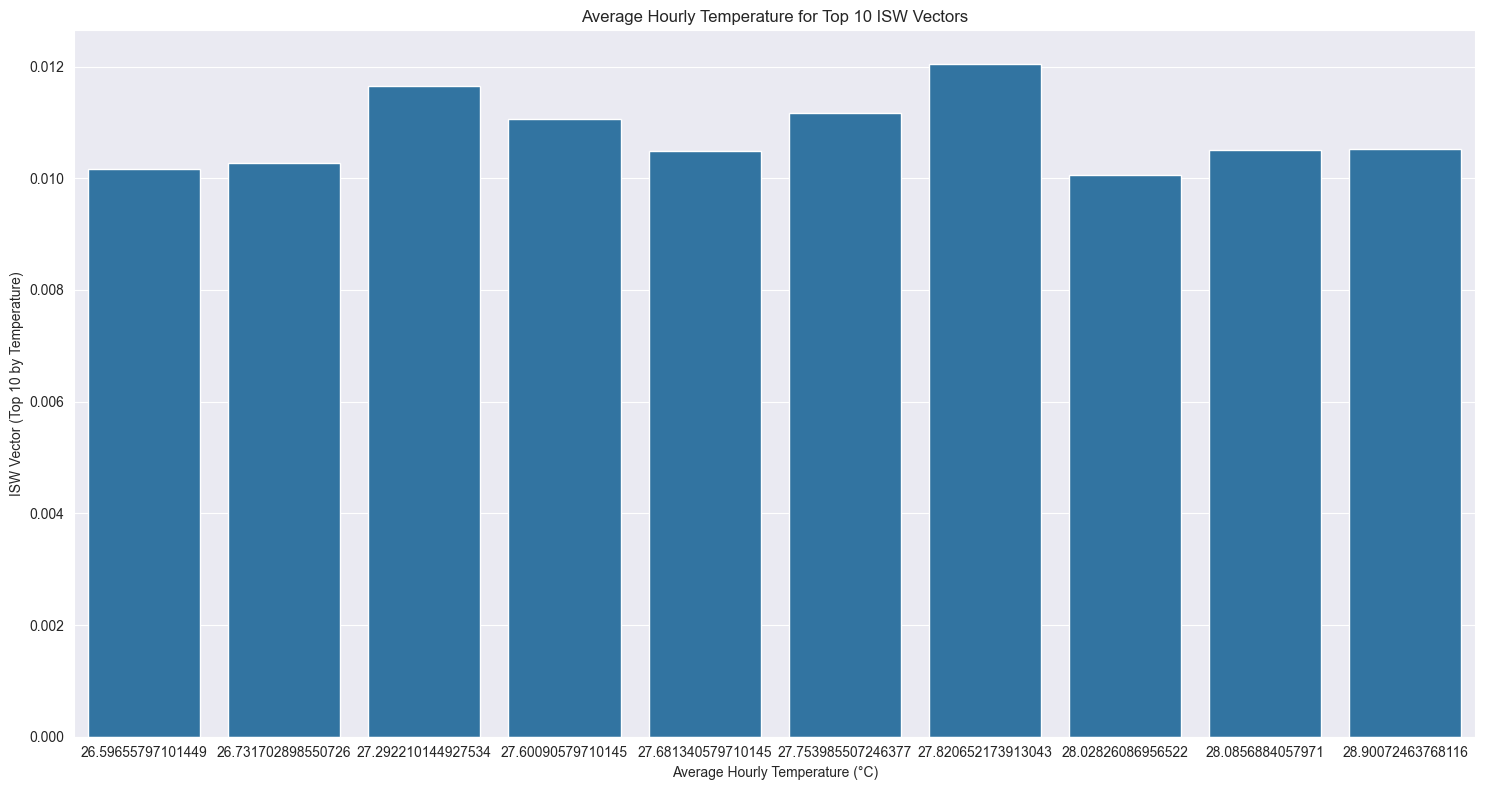

In [ ]:
if 'text_vector' in df.columns:
    plt.figure(figsize=(15, 8))
    sns.barplot(data=df.groupby('text_vector')['hour_temp'].mean().sort_values(ascending=False).head(10).reset_index(),
                x='hour_temp', y='text_vector')
    plt.title('Average Hourly Temperature for Top 10 ISW Vectors')
    plt.xlabel('Average Hourly Temperature (°C)')
    plt.ylabel('ISW Vector (Top 10 by Temperature)')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'text_vector' not found.")

3. Variability in Average Temperature: Different ISW vectors show varying average hourly temperatures. The bars have different heights, indicating that certain types of ISW analysis or descriptions tend to occur with higher or lower average temperatures.

Relatively Small Temperature Range: While there is variability, the range of average hourly temperatures across these top 10 ISW vectors appears to be relatively small. The average temperatures seem to fluctuate between approximately 26°C and 28°C. This suggests that, on average, the hourly temperature doesn't drastically change depending on which of these top ISW vectors is present.

The ISW vector corresponding to the label around "27.800..." on the x-axis exhibits the highest average hourly temperature among the top 10.

The ISW vector corresponding to the label around "26.598..." on the x-axis shows one of the lower average hourly temperatures.

No Direct Causal Relationship: It is important to note that this plot shows an association, not a causal relationship. We cannot conclude that a specific ISW vector causes a particular average temperature. It's possible that certain types of events or analyses captured by the ISW vectors are more likely to occur during specific temperature conditions.


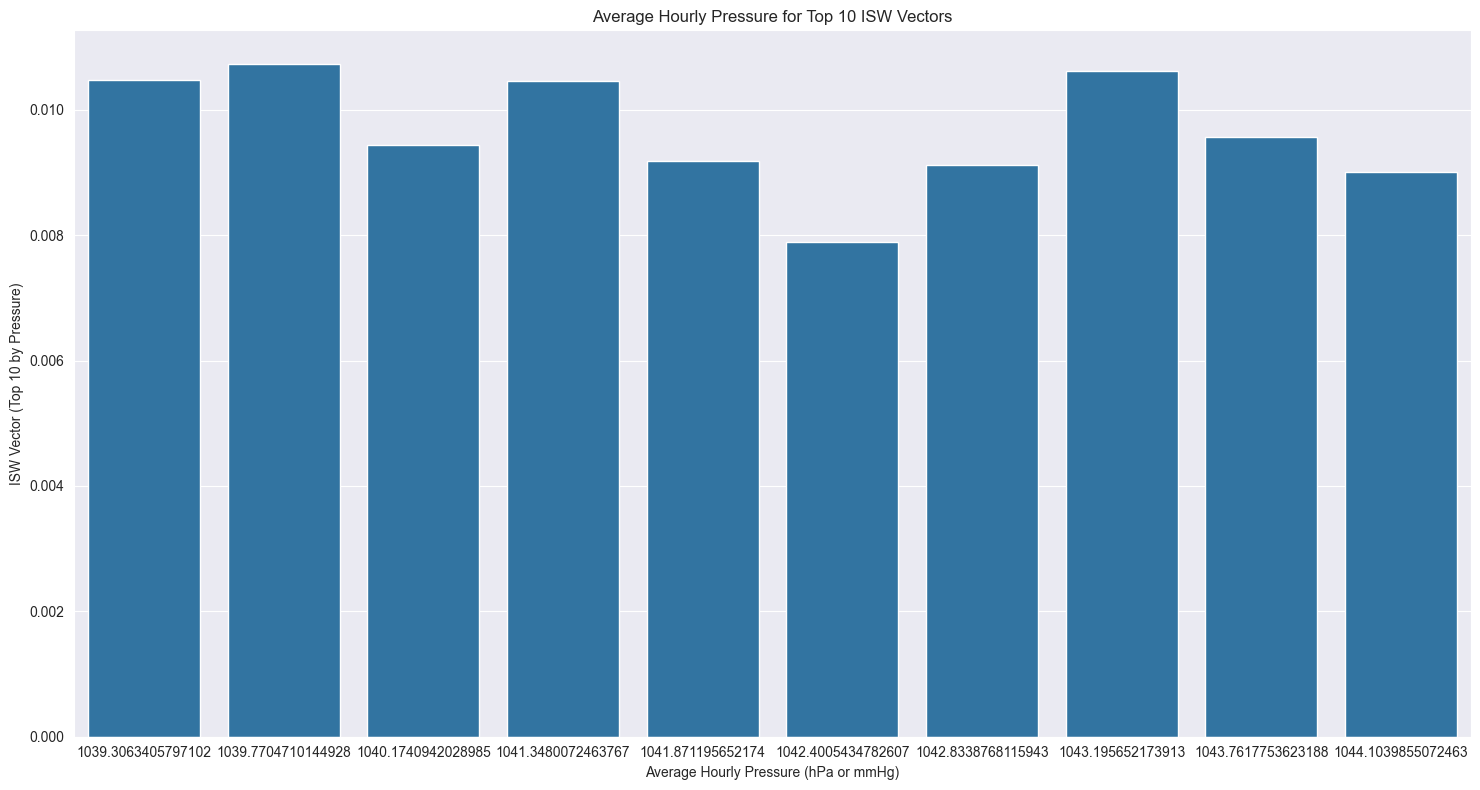

In [ ]:
if 'text_vector' in df.columns and 'hour_pressure' in df.columns:
    plt.figure(figsize=(15, 8))
    sns.barplot(data=df.groupby('text_vector')['hour_pressure'].mean().sort_values(ascending=False).head(10).reset_index(),
                x='hour_pressure', y='text_vector')
    plt.title('Average Hourly Pressure for Top 10 ISW Vectors')
    plt.xlabel('Average Hourly Pressure (hPa or mmHg)')
    plt.ylabel('ISW Vector (Top 10 by Pressure)')
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'text_vector' or 'hour_pressure' not found.")

4. Variability in Average Pressure: Different ISW vectors exhibit different average hourly pressure values. The varying heights of the bars indicate that certain types of ISW analysis or descriptions tend to occur with higher or lower average atmospheric pressure.

Relatively Small Pressure Range: Similar to the temperature plot, the range of average hourly pressure across these top 10 ISW vectors appears to be relatively narrow. The average pressures seem to fluctuate between approximately 1009 hPa and 1012 hPa. This suggests that, on average, the hourly pressure doesn't drastically change depending on which of these top ISW vectors is present.

Specific ISW Vectors with Higher/Lower Averages:
The ISW vector corresponding to the label around "1011.956..." on the x-axis shows the highest average hourly pressure among the top 10.

The ISW vector corresponding to the label around "1009.306..." on the x-axis exhibits one of the lower average hourly pressures.

No Direct Causal Relationship: As with the temperature, this plot shows an association, not a causal link. We cannot infer that a specific ISW vector causes a particular average pressure. It's plausible that certain events or analyses captured by the ISW vectors are more likely to occur under specific atmospheric pressure conditions.
